## MNIST 데이터 셋을 이용한
### 1. 이진 분류(손글씨 숫자를 보고 0인지 아닌지 판별하는 모델)
### 2. 다중 분류

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X, y = mnist['data'], mnist['target']  # y: string type
y = y.astype(np.int)
print(X.shape, y.shape)


X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 데이터가 특정 순서를 갖고 나열되어있을 수 있으므로 무작위로 섞어줌
# 교차 검증 시에 모든 폴드 각각에 있는 데이터가 분류의 분포를 가지도록 함
# 훈련 자체도 학습 데이터의 순서에 영향을 받을 수 있음(SGD는 샘플을 섞는 것이 좋다고 함)
# 단, 주가나 날씨처럼 시간적인 순서가 있는 경우에는 섞으면 망함
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

(70000, 784) (70000,)


In [28]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)


from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# default로 <SVM>을 사용함
# loss='log'로 지정하면 로지스틱 회귀를 사용
sgd_clf = SGDClassifier(max_iter=5, random_state=42, loss='log')
sgd_clf.fit(X_train, y_train_0)  # 학습

# 정확도 측정
y_pred = sgd_clf.predict(X_train)
print(sum(y_pred == y_train_0) / len(y_pred))
print(accuracy_score(y_train_0, y_pred))

from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring='accuracy'))
# cross_val_score(SGDClassifier(max_iter=5, random_state=42), X_train, y_train_0, cv=3, scoring='accuracy')
# 항상 0이 아니다라고 판단하게끔 만들어도 정확도는 90% 정도가 나올 것임. 
# 불균형한 데이터셋(어떤 클래스의 비율이 상대적으로 매우 높은 셋) 등 보통 정확도를 기준으로는 분류기를 판단하지 않음

C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9864666666666667
0.9864666666666667


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0.98705065 0.9869     0.98774939]


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [4]:
from sklearn.model_selection import cross_val_predict

# cross_val_score()와 같이 K-겹 교차 검증을 수행하지만 평가 점수 반환(x), 각 폴드의 테스트에서 얻은 예측 결과를 반환
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

from sklearn.metrics import confusion_matrix

#오차 행렬
print(confusion_matrix(y_train_0, y_train_pred))

C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[[53709   368]
 [  398  5525]]


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


- ### 정밀도(precision) = 맞춘 True의 수 / 전체 True라고 판단한 수 = True라고 판단한 것들 중 실제 True의 비율(`True라는 판단이 얼마나 정확한지`)
- ### 재현율(recall) = 맞춘 True의 수 / 실제 True의 수 = True가 주어졌을 때 True라고 판단하는 비율(`True를 얼마나 놓치지 않고 감지했는지`)
- ### F1 score = 2/(1/정밀도 + 1/재현율) = harmonic_mean(precision, recall)
### 정밀도와 재현율 사이에 trade-off가 있어 상황에 따라 무엇을 우선할지 적절히 선택해야 함

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_0, y_train_pred))
print(recall_score(y_train_0, y_train_pred))
print(f1_score(y_train_0, y_train_pred))

0.9375530290174784
0.9328043221340537
0.9351726472579553


In [15]:
# SGD classifier는 각 데이터마다 점수를 매겨서 그것이 0보다 크면 1, 아니면 0으로 판단
# 기본 임계값은 그렇게 0인데 원하는 정밀도 또는 재현율 수준에 맞게 임계값을 정해야 함

# decision_function()은 점수를 return
y_scores = sgd_clf.decision_function(X_train)
print(y_scores)
print(((y_scores > 0) == y_pred).all())
# predict_proba()은 각 범주에 대한 확률을 return 단, default에서는 SVM이라 사용 불가


# method='decision_function'로 지정하여 결정 점수를 반환하도록 함
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method='decision_function')
print(y_scores)

[ -827025.78750782  -298844.85896834  -207084.81973848 ...
  -812455.15945895 -1142618.48782677  -411416.8676936 ]
True


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[ -927959.04589853  -240423.17418099   -93160.49469802 ...
 -1024383.26408524 -1619752.13734149  -646842.79225385]


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


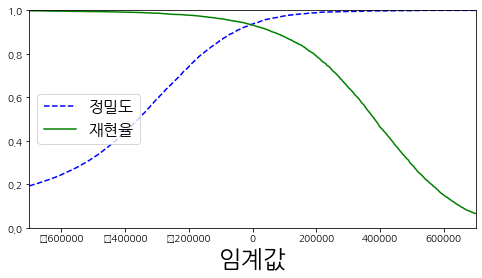

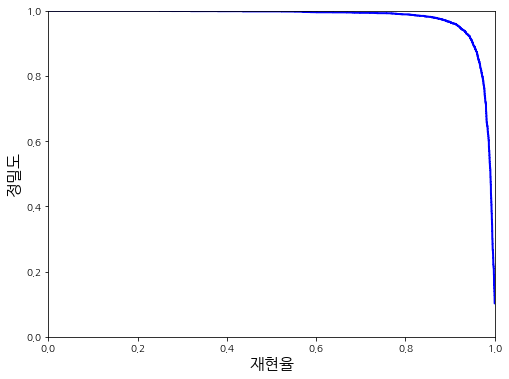

In [16]:
from sklearn.metrics import precision_recall_curve


# 가능한 모든 임계값에 대한 정밀도와 재현율 값 계산
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)
plt.rc('font', family='NanumGothic')  # 한글 지원하는 폰트를 설정해줘야 plot에서 한글이 뜸

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.xlabel("임계값", fontsize=24)
    plt.legend(loc="center left", fontsize=16)
    plt.ylim([0, 1])
    

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

# (재현율, 정밀도) 그래프
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율", fontsize=16)
    plt.ylabel("정밀도", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### 정밀도와 재현율은 항상 함께 고려해줘야 함!

- ROC 곡선: (실제 False 중 잘못 판단한 비율, 실제 True 중 맞게 판단한 비율[재현율]) 그래프 = (실제 False 중 잘못 판단한 비율, True를 놓치지 않고 감지한 비율) 그래프
- 마찬가지로 trade-off 존재

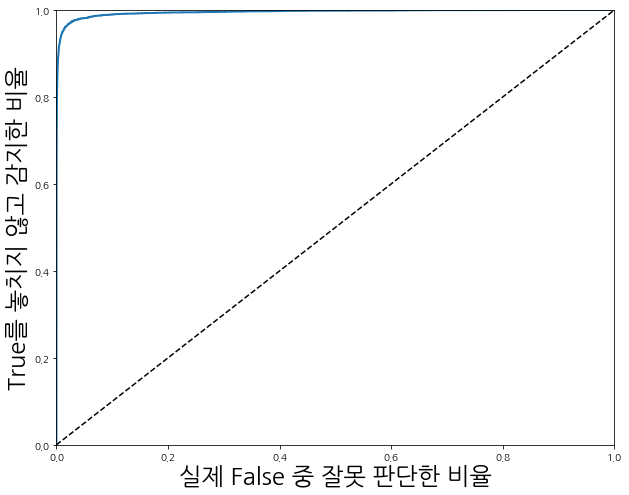

In [17]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('실제 False 중 잘못 판단한 비율', fontsize=24)
    plt.ylabel('True를 놓치지 않고 감지한 비율', fontsize=24)

plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr)
plt.show()

In [18]:
# AUC = <ROC 곡선의 0~1 정적분 값>을 이용하면 분류기들의 성능 비교 가능, 1에 가까울수록 좋음
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.9948659259955392

In [19]:
# 랜덤 포레스트 모델과 비교, 결정 임계치는 0
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3, method='predict_proba')  # 랜덤 포레스트라서 점수는 각 분류에 속할 확률값
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)

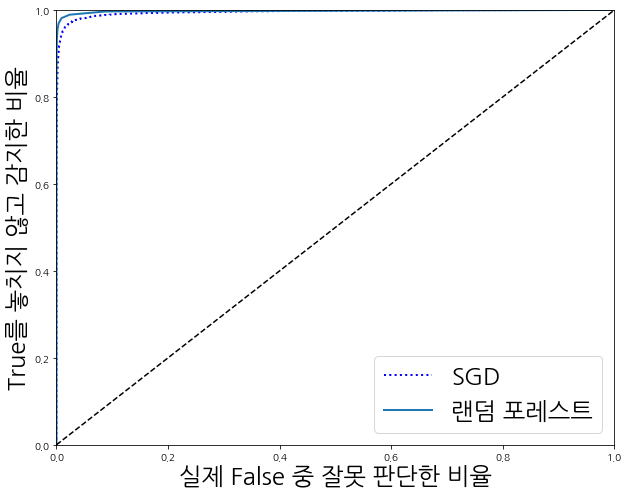

In [20]:
y_scores_forest = y_probas_forest[:, 1] # 모든 행 선택, 열은 1번째 열 선택: True 값에 대한 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0,y_scores_forest)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right", fontsize=24)
plt.show()

forest_clf.fit(X_train, y_train_0)
forest_proba = forest_clf.predict_proba(X_train)
forest_pred = forest_clf.predict(X_train)

In [21]:
print('accuracy: %.4f%%' % np.float(sum(forest_pred == y_train_0) / len(y_train_0)))
print('정밀도:', precision_score(y_train_0, y_train_pred_forest))
print('재현율', recall_score(y_train_0, y_train_pred_forest))

accuracy: 0.9997%
정밀도: 0.9928109273903667
재현율 0.9326354887725815


## 다중분류(OvA 방식)

In [33]:
# SGDClassifier은 여러 범주일 경우 기본적으로 OvA 방식을 사용하여 여러 범주마다 회귀 모델을 만듦, 결정 점수가 최대인 것 선택
# 다중 로지스틱 회귀 모델을 사용하고 싶으면 softmax 회귀를 사용해야 함
sgd_clf_mul = SGDClassifier(max_iter=5, random_state=42, loss='log')
sgd_clf_mul.fit(X_train, y_train)
y_mul_score = sgd_clf_mul.decision_function(X_train)

C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [44]:
y_mul_train_pred = sgd_clf_mul.predict(X_train)

# 결정점수가 최대인 9가 선택됨
print(y_mul_score[0])
print(y_mul_train_pred[0])
print(cross_val_score(sgd_clf_mul, X_train, y_train, cv=3, scoring='accuracy'))
print(accuracy_score(y_train, y_mul_train_pred))

[-786261.25840765 -583581.65854739 -341773.35398949 -420238.64445467
 -290226.62821323 -404886.92679346 -441848.12226611 -162557.15681999
 -489794.83768119  111715.12252608]
9


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0.86292741 0.86144307 0.82882432]
0.8807833333333334
0.8788


C:\ProgramData\Anaconda3\envs\handson\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [37]:
# 랜덤포레스트
forest_clf_mul = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf_mul.fit(X_train, y_train)
y_mul_train_pred_f = forest_clf_mul.predict(X_train)

In [45]:
print(forest_clf_mul.predict_proba(X_train))
print(cross_val_score(forest_clf_mul, X_train, y_train, cv=3, scoring='accuracy'))
print(accuracy_score(y_train, y_mul_train_pred_f))


[[0.  0.  0.  ... 0.  0.  1. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.1 0.  0.9]]
[0.94281144 0.94084704 0.94079112]
0.99905
0.9506


## 이외에도, 다중 레이블 분류와 다중 출력 분류 등이 있음
- 다중 레이블 분류: 동시에 True가 될 수 있는 여러 이진 범주에 대한 분류기. 예) (사람, 100kg 이하, 안경 씀) - [1, 0, 1] 출력
- 다중 출력 클래스 분류: 다중 레이블 분류에서 각 레이블(범주)이 다중 클래스가 될 수 있음. 예) (R, G, B) - [255, 255, 144] 출력